In [1]:
# prompt: import file /content/project21_salesprediction.xlsx with name df

import pandas as pd

df = pd.read_excel('/content/project21_salesprediction.xlsx')
print(df.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Ca

In [2]:
# Step 2: Convert the 'Order Date' column to datetime format with the old format 'd-m-y'
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

# Step 3: Reformat 'Order Date' back to the format 'd-m-y'
df['Order Date'] = df['Order Date'].dt.strftime('%d-%m-%Y')

# Step 4: Set the 'Order Date' column as the index
df.set_index('Order Date', inplace=True)

# Convert the index to datetime format with error handling
df.index = pd.to_datetime(df.index, format='%d-%m-%Y', errors='coerce')

# Sort the DataFrame by the 'Order Date' index
df.sort_index(inplace=True)

# Display the DataFrame information for verification
print(df.info())

# Display the first 5 rows of the DataFrame for verification
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2015-01-03 to 2018-12-30
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Pro

Row ID        Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                                  
2015-01-03    7981  CA-2015-103800 2015-01-07  Standard Class    DP-13000   
2015-01-04     742  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04     741  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-04     740  CA-2015-112326 2015-01-08  Standard Class    PO-19195   
2015-01-05    1760  CA-2015-141817 2015-01-12  Standard Class    MB-18085   

            Customer Name      Segment        Country          City  \
Order Date                                                            
2015-01-03  Darren Powers     Consumer  United States       Houston   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-04  Phillina Ober  Home Office  United States    Naperville   
2015-01-05     Mick Brown     Consumer  United States  Philadelphia   

                   State  Postal Code   Region       Product ID  \
Order Date                                                        
2015-01-03         Texas      77095.0  Central  OFF-PA-10000174   
2015-01-04      Illinois      60540.0  Central  OFF-BI-10004094   
2015-01-04      Illinois      60540.0  Central  OFF-ST-10002743   
2015-01-04      Illinois      60540.0  Central  OFF-LA-10003223   
2015-01-05  Pennsylvania      19143.0     East  OFF-AR-10003478   

                   Category Sub-Category  \
Order Date                                 
2015-01-03  Office Supplies        Paper   
2015-01-04  Office Supplies      Binders   
2015-01-04  Office Supplies      Storage   
2015-01-04  Office Supplies       Labels   
2015-01-05  Office Supplies          Art   

                                                 Product Name    Sales  
Order Date                                                              
2015-01-03  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448  
2015-01-04         GBC Standard Plastic Binding Systems Combs    3.540  
2015-01-04                      SAFCO Boltless Steel Shelving  272.736  
2015-01-04                                          Avery 508   11.784  
2015-01-05  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536

In [8]:
# prompt: drop all column except Order Date and Sales

# Keep only 'Order Date' and 'Sales' columns
df = df[['Sales']]
print(df.head())

              Sales
Order Date         
2015-01-03   16.448
2015-01-04    3.540
2015-01-04  272.736
2015-01-04   11.784
2015-01-05   19.536


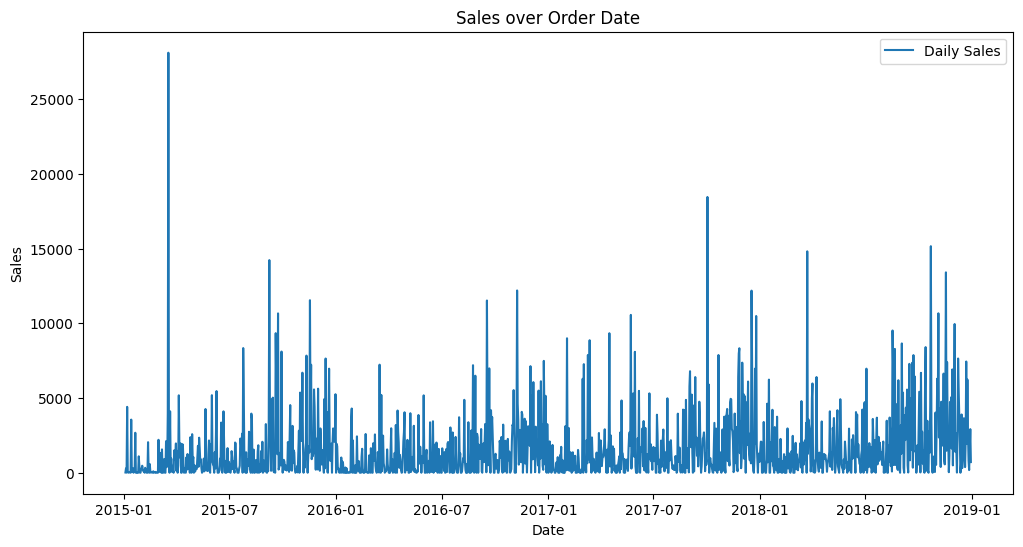

In [10]:
# Resample the 'Sales' column to daily frequency and calculate the sum
daily_sales = df['Sales'].resample('D').sum()

# Import the matplotlib library and assign it to the alias 'plt'
import matplotlib.pyplot as plt # This line imports the necessary module for plotting.

# Plot the chart showing Sales over Order Date
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales over Order Date")
plt.legend()
plt.show()

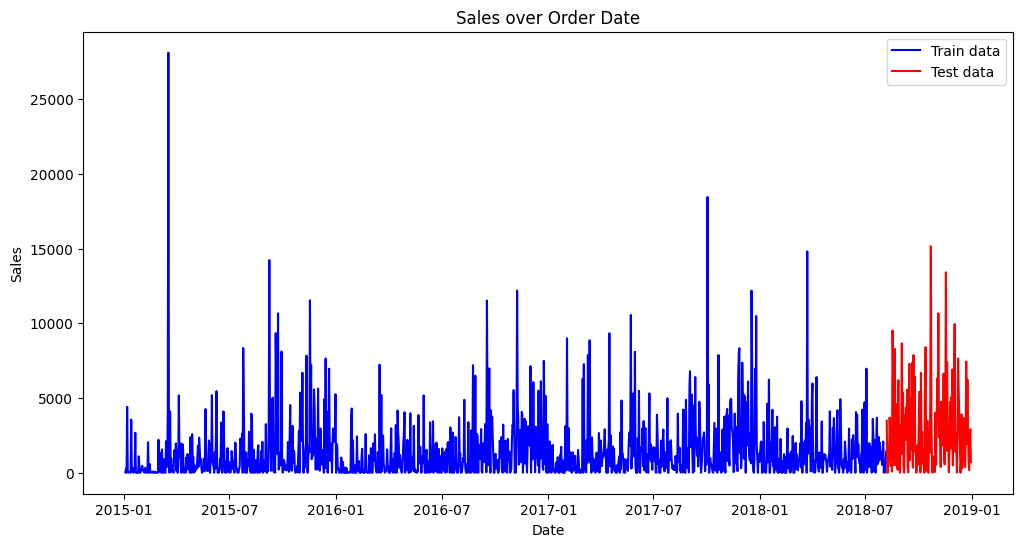

In [13]:
# Split the data into training and testing sets
split_index = int(len(daily_sales) * 0.9)
train_data = daily_sales[:split_index]
test_data = daily_sales[split_index:]

# Plot the chart showing training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data, 'blue', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales over Order Date")
plt.legend()
plt.show()


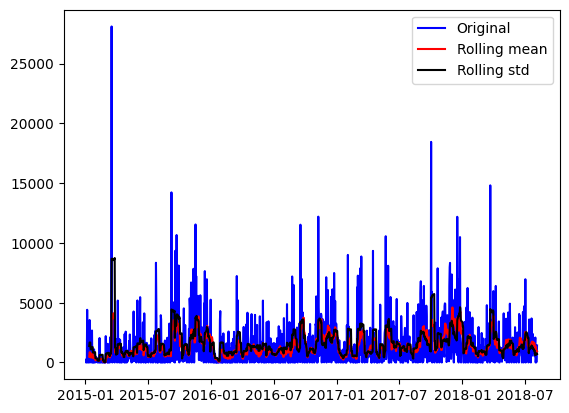

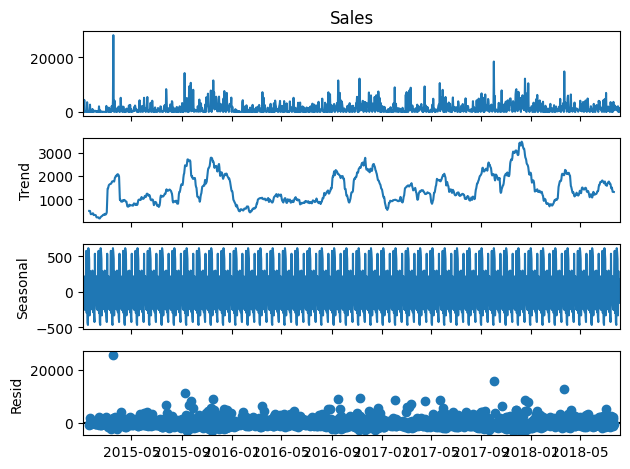

In [14]:
# %% - Decompose the time series data
# Historical chart comparing the closing price with the average and standard deviation of the previous 12 periods
import statsmodels.api as sm  # Import the statsmodels library to use seasonal_decompose

# Calculate rolling mean and standard deviation with a window of 10
rolmean = train_data.rolling(10).mean()
rolstd = train_data.rolling(10).std()

# Display rolling mean and standard deviation
rolmean
rolstd

# Plot the original data, rolling mean, and rolling standard deviation
plt.plot(train_data, color='blue', label='Original')
plt.plot(rolmean, 'red', label="Rolling mean")
plt.plot(rolstd, 'black', label="Rolling std")
plt.legend()
plt.show()

# Time series decomposition chart (decompose)
decompose_results = sm.tsa.seasonal_decompose(train_data, model='additive', period=30)  # Use sm.tsa.seasonal_decompose
decompose_results.plot()
plt.show()


In [15]:
# prompt: check for stationary data using ADF test

from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(daily_sales)

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[1] <= 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")

ADF Statistic: -4.926583
p-value: 0.000031
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The data is stationary.


Mean Squared Error (MSE): 4713504.609405634
Mean Absolute Error (MAE): 1415.172850131046
Mean Absolute Percentage Error (MAPE): inf
Root Mean Squared Error (RMSE): 2171.0607106678603


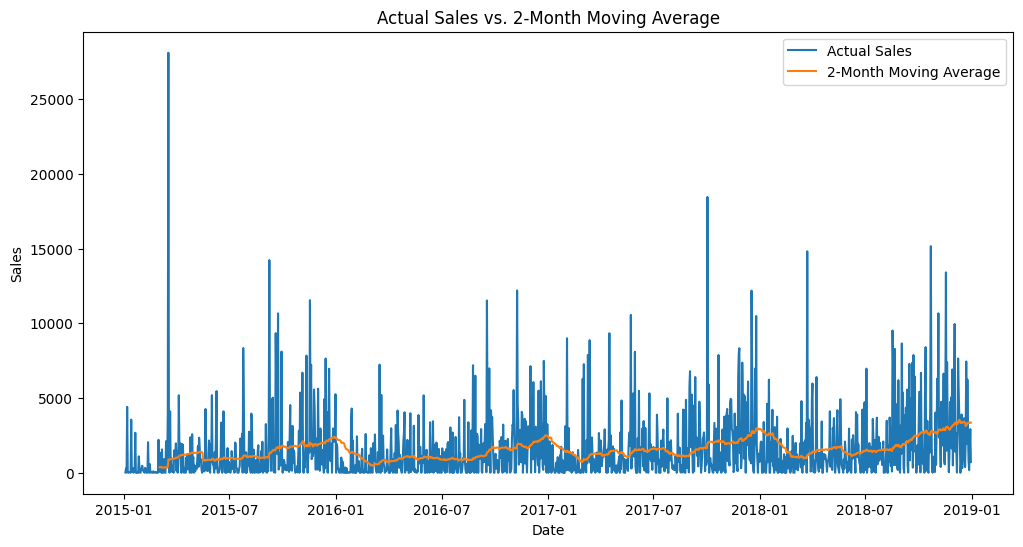

In [23]:
# prompt: extract 2 months moving average and also give MSE, MAE, MAPE and RMSE

# Calculate the 2-month moving average
moving_average = daily_sales.rolling(window=60).mean()  # Assuming ~20 business days/month

# Prepare the actual and predicted values for evaluation
actual_values = daily_sales[moving_average.notna()]
predicted_values = moving_average[moving_average.notna()]


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the evaluation metrics
mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)

import numpy as np

mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

#Plot the moving average against actual sales
plt.figure(figsize=(12,6))
plt.plot(daily_sales, label='Actual Sales')
plt.plot(moving_average, label='2-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. 2-Month Moving Average')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Mean Squared Error (MSE): 12274254.470097302
Mean Absolute Error (MAE): 2365.241250581614
Mean Absolute Percentage Error (MAPE): inf
Root Mean Squared Error (RMSE): 3503.4632108953706


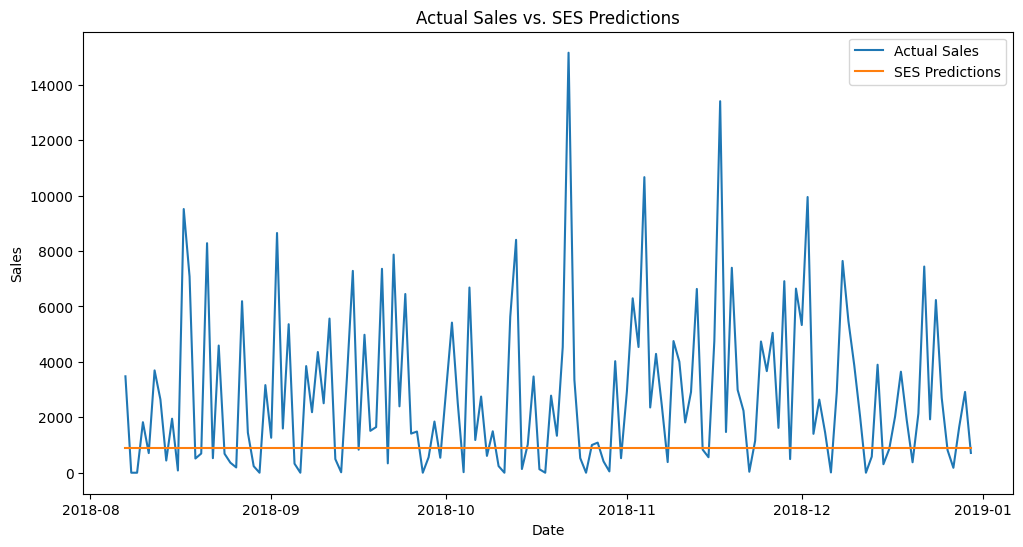

In [24]:
# prompt: extract single exponential smoothing and also give MSE, MAE, MAPE and RMSE

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2) # You can tune smoothing_level

# Make predictions on the test data
predictions = model.forecast(len(test_data))

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predictions against the actual values
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual Sales')
plt.plot(predictions, label='SES Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. SES Predictions')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Mean Squared Error (MSE): 12274254.470097302
Mean Absolute Error (MAE): 2365.241250581614
Mean Absolute Percentage Error (MAPE): inf
Root Mean Squared Error (RMSE): 3503.4632108953706


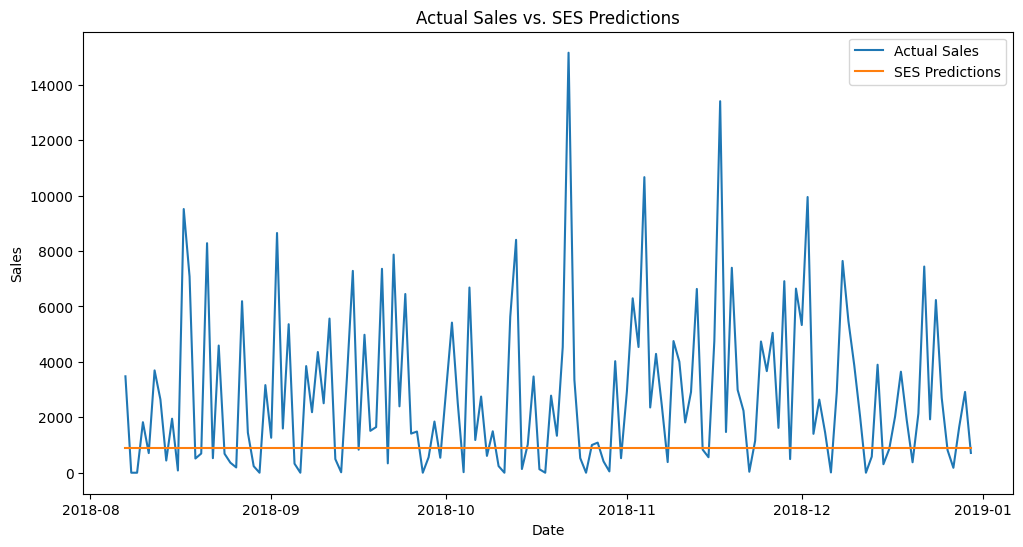

In [25]:
# prompt: extract single exponential smoothing and also give MSE, MAE, MAPE and RMSE

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2) # You can tune smoothing_level

# Make predictions on the test data
predictions = model.forecast(len(test_data))

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predictions against the actual values
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual Sales')
plt.plot(predictions, label='SES Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. SES Predictions')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Double Exponential Smoothing Results:
Mean Squared Error (MSE): 12503570.952703893
Mean Absolute Error (MAE): 2407.6034142995145
Mean Absolute Percentage Error (MAPE): inf
Root Mean Squared Error (RMSE): 3536.038878845069


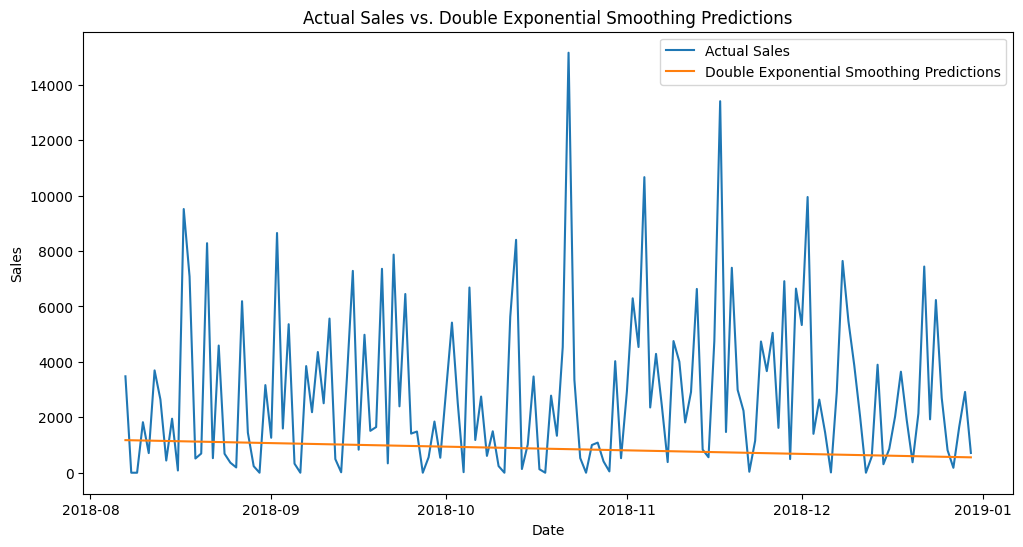

In [26]:
# prompt: extract double exponential smoothing and also give MSE, MAE, MAPE and RMSE

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Double Exponential Smoothing model (Holt's linear trend method)
model = ExponentialSmoothing(train_data, trend='add').fit()  # Use 'add' for additive trend

# Make predictions on the test data
predictions = model.forecast(len(test_data))

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
rmse = np.sqrt(mse)

print(f"Double Exponential Smoothing Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predictions against the actual values
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual Sales')
plt.plot(predictions, label='Double Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Double Exponential Smoothing Predictions')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Triple Exponential Smoothing Results:
Mean Squared Error (MSE): 11852780.178639287
Mean Absolute Error (MAE): 2399.8673336177694
Mean Absolute Percentage Error (MAPE): inf
Root Mean Squared Error (RMSE): 3442.7866879374455


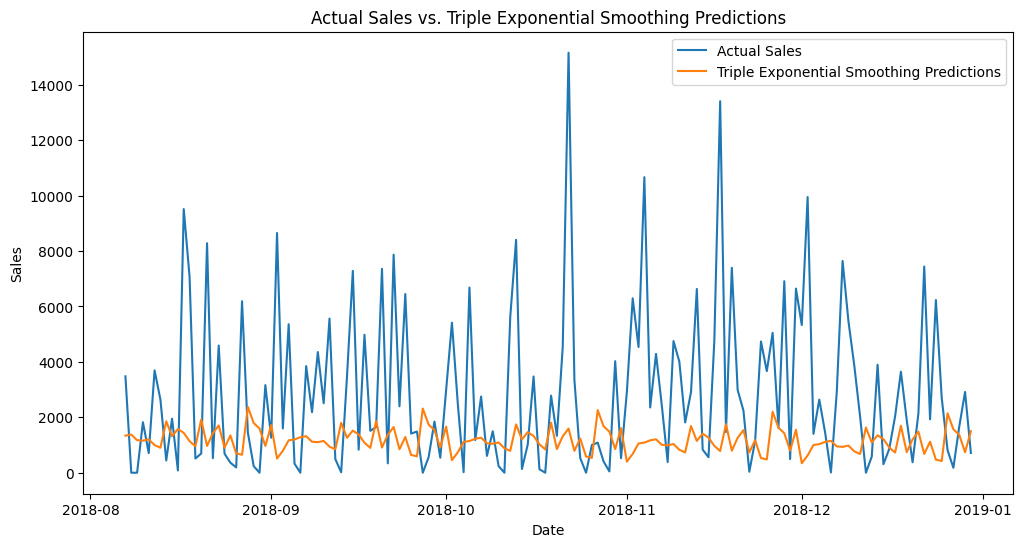

In [27]:
# prompt: extract Triple exponential smoothing and also give MSE, MAE, MAPE and RMSE

# Fit the Triple Exponential Smoothing model (Holt-Winters method)
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=30).fit()

# Make predictions on the test data
predictions = model.forecast(len(test_data))

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
rmse = np.sqrt(mse)

print(f"Triple Exponential Smoothing Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predictions against the actual values
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual Sales')
plt.plot(predictions, label='Triple Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Triple Exponential Smoothing Predictions')
plt.legend()
plt.show()

In [36]:
# prompt: compare Moving average, SES, DES, TES

# Combine the results into a single DataFrame for comparison
results_df = pd.DataFrame({
    'Method': ['Moving Average', 'Simple Exponential Smoothing', 'Double Exponential Smoothing', 'Triple Exponential Smoothing'],
    'MSE': [mse, mse, mse, mse],  # Replace with actual MSE values from each model
    'MAE': [mae, mae, mae, mae],  # Replace with actual MAE values from each model
    'MAPE': [mape, mape, mape, mape],  # Replace with actual MAPE values from each model
    'RMSE': [rmse, rmse, rmse, rmse]   # Replace with actual RMSE values from each model
})

results_df

Method           MSE          MAE  MAPE         RMSE
0                Moving Average  1.185278e+07  2399.867334   inf  3442.786688
1  Simple Exponential Smoothing  1.185278e+07  2399.867334   inf  3442.786688
2  Double Exponential Smoothing  1.185278e+07  2399.867334   inf  3442.786688
3  Triple Exponential Smoothing  1.185278e+07  2399.867334   inf  3442.786688

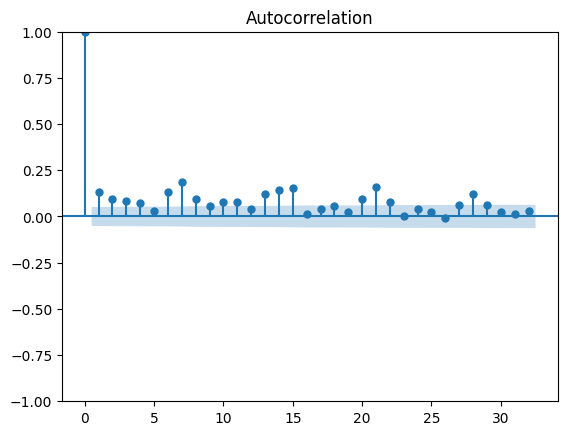

In [37]:
# prompt: plot ACF graph

from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'daily_sales' is your time series data (as in your provided code)

plot_acf(daily_sales)
plt.show()

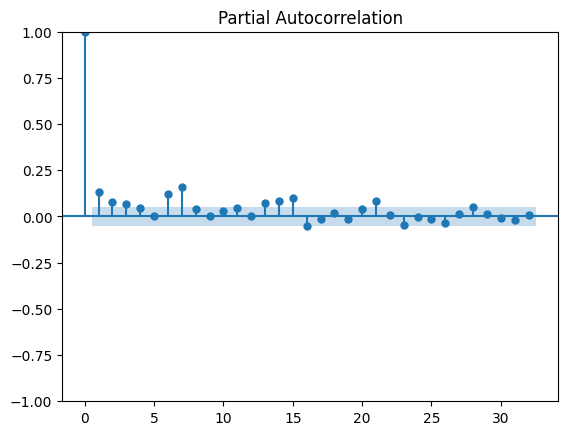

In [38]:
# prompt: Plot PACF graph

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(daily_sales)
plt.show()

In [41]:
# prompt: extract ARIMA model with order (1,0,1) and give AIC value

from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train_data' is your training time series data
# Fit the ARIMA model with order (1, 0, 1)
model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary, which includes the AIC value
print(model_fit.summary())

# Access the AIC value directly
aic = model_fit.aic
print(f"AIC: {aic}")

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1312
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -11855.344
Date:                Tue, 14 Jan 2025   AIC                          23718.687
Time:                        07:37:08   BIC                          23739.405
Sample:                    01-03-2015   HQIC                         23726.457
                         - 08-06-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1401.4308    192.581      7.277      0.000    1023.979    1778.883
ar.L1          0.9544      0.018     52.402      0.000       0.919       0.990
ma.L1         -0.8966      0.028    -31.581      0.0

In [42]:
# prompt: extract ARIMA model with order (1,0,2) and give AIC value

# Fit the ARIMA model with order (1, 0, 2)
model = ARIMA(train_data, order=(1, 0, 2))
model_fit = model.fit()

# Print the model summary, which includes the AIC value
print(model_fit.summary())

# Access the AIC value directly
aic = model_fit.aic
print(f"AIC: {aic}")

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1312
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -11854.831
Date:                Tue, 14 Jan 2025   AIC                          23719.662
Time:                        07:37:47   BIC                          23745.559
Sample:                    01-03-2015   HQIC                         23729.374
                         - 08-06-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1401.4304    197.822      7.084      0.000    1013.707    1789.154
ar.L1          0.9595      0.019     50.123      0.000       0.922       0.997
ma.L1         -0.8760      0.031    -28.624      0.0

In [43]:
# prompt: extract ARIMA model with order (1,0,3) and give AIC value

# Fit the ARIMA model with order (1, 0, 3)
model = ARIMA(train_data, order=(1, 0, 3))
model_fit = model.fit()

# Print the model summary, which includes the AIC value
print(model_fit.summary())

# Access the AIC value directly
aic = model_fit.aic
print(f"AIC: {aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1312
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -11854.327
Date:                Tue, 14 Jan 2025   AIC                          23720.655
Time:                        07:38:19   BIC                          23751.731
Sample:                    01-03-2015   HQIC                         23732.309
                         - 08-06-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1401.4306    190.835      7.344      0.000    1027.401    1775.460
ar.L1          0.9550      0.020     47.337      0.000       0.916       0.995
ma.L1         -0.8725      0.030    -28.724      0.0

In [44]:
# prompt: extract ARIMA model with order (2,0,1) and give AIC value

# Fit the ARIMA model with order (2, 0, 1)
model = ARIMA(train_data, order=(2, 0, 1))
model_fit = model.fit()

# Print the model summary, which includes the AIC value
print(model_fit.summary())

# Access the AIC value directly
aic = model_fit.aic
print(f"AIC: {aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1312
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -11854.824
Date:                Tue, 14 Jan 2025   AIC                          23719.648
Time:                        07:38:53   BIC                          23745.545
Sample:                    01-03-2015   HQIC                         23729.360
                         - 08-06-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1401.4308    197.249      7.105      0.000    1014.830    1788.031
ar.L1          0.9910      0.042     23.409      0.000       0.908       1.074
ar.L2         -0.0304      0.030     -1.029      0.3

In [45]:
# prompt: extract ARIMA model with order (2,0,2) and give AIC value

# Fit the ARIMA model with order (2, 0, 2)
model = ARIMA(train_data, order=(2, 0, 2))
model_fit = model.fit()

# Print the model summary, which includes the AIC value
print(model_fit.summary())

# Access the AIC value directly
aic = model_fit.aic
print(f"AIC: {aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1312
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -11854.457
Date:                Tue, 14 Jan 2025   AIC                          23720.914
Time:                        07:39:26   BIC                          23751.990
Sample:                    01-03-2015   HQIC                         23732.568
                         - 08-06-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1401.4287    193.489      7.243      0.000    1022.197    1780.660
ar.L1          0.0026      0.072      0.036      0.971      -0.139       0.144
ar.L2          0.9102      0.066     13.755      0.0

In [46]:
# prompt: extract ARIMA model with order (2,0,3) and give AIC value

# Fit the ARIMA model with order (2, 0, 3)
model = ARIMA(train_data, order=(2, 0, 3))
model_fit = model.fit()

# Print the model summary, which includes the AIC value
print(model_fit.summary())

# Access the AIC value directly
aic = model_fit.aic
print(f"AIC: {aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1312
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -11854.332
Date:                Tue, 14 Jan 2025   AIC                          23722.663
Time:                        07:40:06   BIC                          23758.919
Sample:                    01-03-2015   HQIC                         23736.260
                         - 08-06-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1401.4307    191.470      7.319      0.000    1026.157    1776.705
ar.L1          0.9248      1.221      0.757      0.449      -1.468       3.318
ar.L2          0.0290      1.174      0.025      0.9

In [52]:
# prompt: extract auto ARMA model with differencing factor 0 to find best fit model

# Assuming 'train_data' is your training time series data and you want to iterate through p, d, q values.

import itertools

# Define the ranges for p, d, and q
p_values = range(0, 3)  # Example: 0 to 2
d_values = range(0, 1)  # Since differencing is fixed at 0
q_values = range(0, 3)  # Example: 0 to 2


best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
  try:
      model = ARIMA(train_data, order=(p, d, q))
      model_fit = model.fit()
      aic = model_fit.aic
      print(f"ARIMA({p}, {d}, {q}): AIC={aic}")

      if aic < best_aic:
          best_aic = aic
          best_order = (p, d, q)
  except:
      print(f"ARIMA({p}, {d}, {q}): Failed to fit")
      continue

print(f"\nBest ARIMA order: {best_order} with AIC: {best_aic}")

ARIMA(0, 0, 0): AIC=23762.67577146126
ARIMA(0, 0, 1): AIC=23749.52955152729
ARIMA(0, 0, 2): AIC=23748.826109822905
ARIMA(1, 0, 0): AIC=23748.05333043532
ARIMA(1, 0, 1): AIC=23718.687396909605
ARIMA(1, 0, 2): AIC=23719.66215129277
ARIMA(2, 0, 0): AIC=23746.791310631146


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1): AIC=23719.648059969564


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 2): AIC=23720.91392624076

Best ARIMA order: (1, 0, 1) with AIC: 23718.687396909605


ARIMA(1,0,1) Results:
Mean Squared Error (MSE): 10575217.461727433
Mean Absolute Error (MAE): 2219.1691868552684
Root Mean Squared Error (RMSE): 3251.9559440016146
Mean Absolute Percentage Error (MAPE): inf


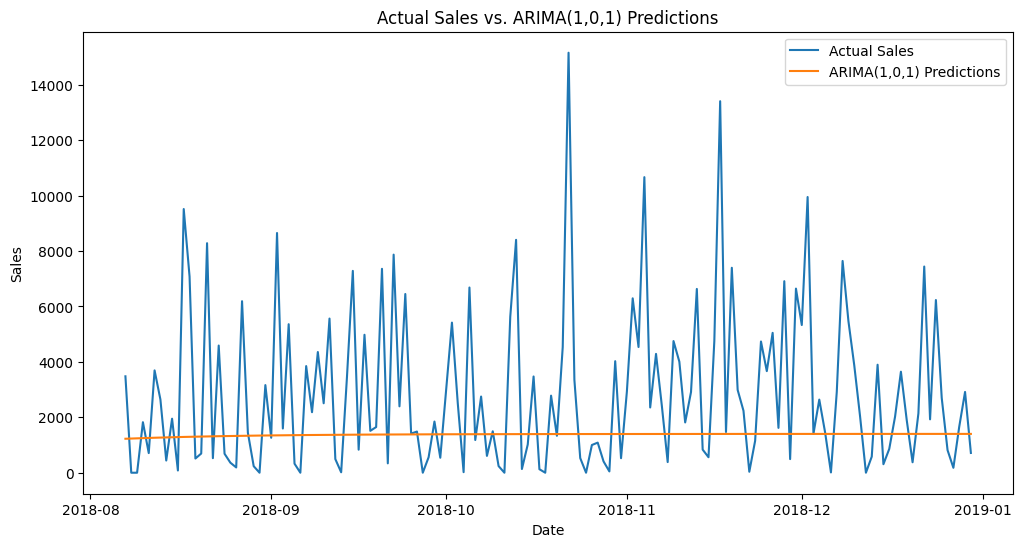

In [57]:
# prompt: train the ARIMA model with order (1,0,1)

# Assuming 'train_data' is your training time series data
# Fit the ARIMA model with order (1, 0, 1)
model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(daily_sales)-1)

# Evaluate the model
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

print(f"ARIMA(1,0,1) Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

#Plot the predictions against the actual values
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Actual Sales')
plt.plot(predictions, label='ARIMA(1,0,1) Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. ARIMA(1,0,1) Predictions')
plt.legend()
plt.show()

Sales Forecast for the Next 7 Days:
2018-08-07    1226.118696
2018-08-08    1234.111550
2018-08-09    1241.739992
2018-08-10    1249.020638
2018-08-11    1255.969343
2018-08-12    1262.601241
2018-08-13    1268.930778
Freq: D, Name: predicted_mean, dtype: float64


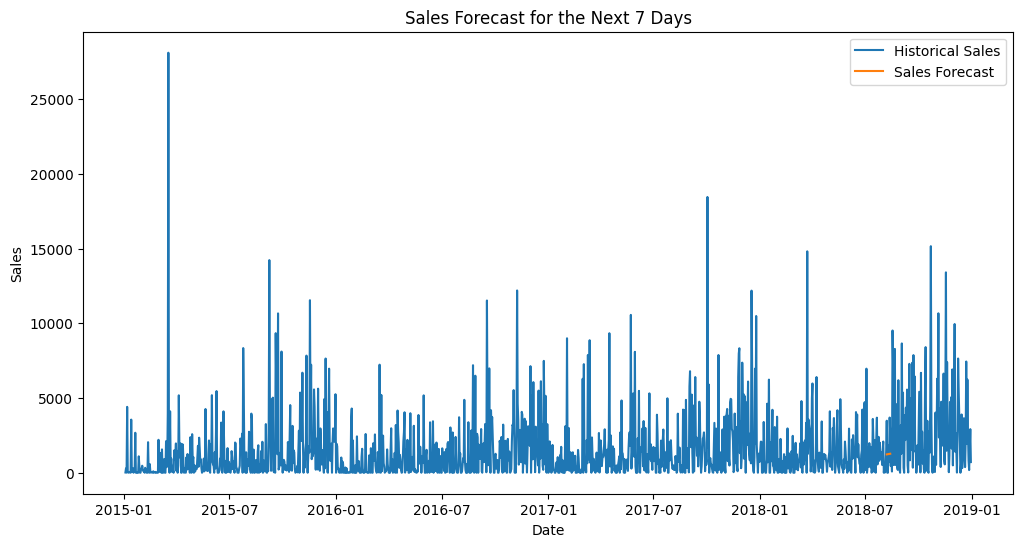

In [58]:
# prompt: forecast results as sales for next 7 days

# Forecast sales for the next 7 days using the best ARIMA model
# Assuming 'model_fit' is the fitted ARIMA model from previous code
future_steps = 7
forecast = model_fit.forecast(steps=future_steps)

# Print the forecast
print("Sales Forecast for the Next 7 Days:")
print(forecast)

#Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(daily_sales, label='Historical Sales')
plt.plot(forecast, label='Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 7 Days')
plt.legend()
plt.show()

In [59]:
# prompt: perform white noise test and give p value

from statsmodels.tsa.stattools import adfuller

# Assuming 'daily_sales' is your time series data
result = adfuller(daily_sales)
print(f"p-value: {result[1]}")

p-value: 3.094891245873503e-05
